In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time
import re
import nltk
import math
import pickle

#import xgboost
#from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn import linear_model
from sklearn.linear_model import Perceptron

from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
import sklearn.metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sklearn import preprocessing
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import datasets

%matplotlib inline

## Neural Network 

In [2]:
from keras.models import Sequential, load_model
from keras.layers.core import Dense, Dropout, Activation
from keras.utils import np_utils

import tensorflow_datasets as tfds
import tensorflow as tf
# Fetch the dataset directly
mnist = tfds.image.MNIST()

#mnist_data = tfds.load("mnist")
#mnist_train, mnist_test = mnist_data["train"], mnist_data["test"]

Using TensorFlow backend.


In [3]:
# tutorial from https://nextjournal.com/gkoehler/digit-recognition-with-keras

In [4]:
from keras.datasets import mnist

In [5]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [6]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


## Label Encoding

In [7]:
from keras.utils.np_utils import to_categorical

print(y_train.shape)
print(y_test.shape)

(60000,)
(10000,)


In [8]:
print(len(X_train))

60000


In [9]:
# one-hot encoding using keras' numpy-related utilities
n_classes = 10
print("Shape before one-hot encoding: ", y_train.shape)
# Encode labels to one hot vectors (ex : 2 -> [0,0,1,0,0,0,0,0,0,0])
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
print("Shape after one-hot encoding: ", y_train.shape)

Shape before one-hot encoding:  (60000,)
Shape after one-hot encoding:  (60000, 10)


In [10]:
# let's print the shape before we reshape and normalize
print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

# building the input vector from the 28x28 pixels
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')


X_train shape (60000, 28, 28)
y_train shape (60000, 10)
X_test shape (10000, 28, 28)
y_test shape (10000, 10)


In [11]:
# Normalizing the data to help with the training
X_train /= 255
X_test /= 255

# print the final input shape ready for training
print("Train matrix shape", X_train.shape)
print("Test matrix shape", X_test.shape)

Train matrix shape (60000, 784)
Test matrix shape (10000, 784)


In [12]:
print(np.unique(y_train, return_counts=True))

(array([0., 1.], dtype=float32), array([540000,  60000]))


## Build the Neural Network model

In [13]:
# building a linear stack of layers with the sequential model
model = Sequential()
model.add(Dense(512, input_shape=(784,)))
model.add(Activation('relu'))                            
model.add(Dropout(0.2))

model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(10))
model.add(Activation('softmax'))

In [14]:
# 8. Compile model
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
 
#model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [15]:
# 9. Fit model on training data
model.fit(X_train, y_train,batch_size=32,nb_epoch=10, verbose=1)
 

/Users/scottlew/anaconda2/envs/py3/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Epoch 1/10
60000/60000 [==============================] - 55s 912us/step - loss: 0.2141 - accuracy: 0.9340
Epoch 2/10
60000/60000 [==============================] - 53s 889us/step - loss: 0.1054 - accuracy: 0.9676
Epoch 3/10
60000/60000 [==============================] - 53s 890us/step - loss: 0.0816 - accuracy: 0.9747
Epoch 4/10
60000/60000 [==============================] - 53s 885us/step - loss: 0.0648 - accuracy: 0.9799
Epoch 5/10
60000/60000 [==============================] - 56s 934us/step - loss: 0.0563 - accuracy: 0.9819
Epoch 6/10
60000/60000 [==============================] - 56s 931us/step - loss: 0.0508 - accuracy: 0.9840
Epoch 7/10
60000/60000 [==============================] - 50s 827us/step - loss: 0.0438 - accuracy: 0.9859
Epoch 8/10
60000/60000 [==============================] - 50s 826us/step - loss: 0.0443 - accuracy: 0.9859
Epoch 9/10
60000/60000 [==============================] - 50s 830us/step - loss: 0.0392 - accuracy: 0.9880
Epoch 10/10
60000/60000 [============

In [16]:
# 10. Evaluate model on test data
score = model.evaluate(X_test, y_test, verbose=0)

print(score[1])

0.9783999919891357


In [17]:
y_pred = model.predict(X_test)

In [18]:
y_pred

array([[1.2411315e-21, 1.3547061e-16, 2.6878841e-15, ..., 1.0000000e+00,
        5.3250253e-21, 1.1999291e-15],
       [1.9811561e-17, 1.6895285e-09, 1.0000000e+00, ..., 1.2277714e-14,
        1.2231730e-19, 4.5756194e-27],
       [1.5383836e-12, 1.0000000e+00, 8.9650882e-12, ..., 4.7763543e-10,
        2.2654028e-08, 2.9987091e-13],
       ...,
       [5.5160022e-22, 2.4888549e-16, 9.9623242e-20, ..., 2.0036427e-12,
        5.6797648e-19, 2.0692581e-11],
       [2.6813819e-22, 1.2204696e-27, 1.0696908e-26, ..., 5.5493745e-28,
        4.3568292e-15, 5.9487859e-24],
       [9.5096537e-16, 2.7075211e-21, 3.1507970e-15, ..., 6.8990847e-23,
        7.2780177e-13, 3.2572208e-14]], dtype=float32)

In [19]:
y_pred_original=np.argmax(y_pred,axis=1)

y_pred_original

array([7, 2, 1, ..., 4, 5, 6])

In [20]:
y_test_original=np.argmax(y_test,axis=1)

y_test_original

array([7, 2, 1, ..., 4, 5, 6])

In [21]:
y_test

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [22]:
y_test.shape

(10000, 10)

Text(0.5, 1.0, 'Confusion Matrix for MNIST Neural Network Classifier')

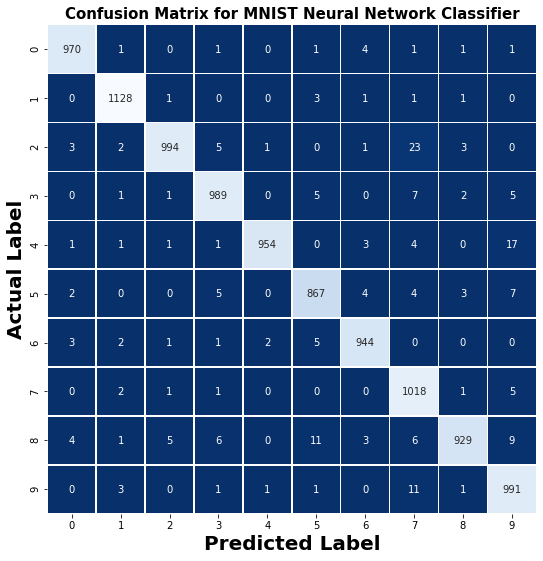

In [24]:
cm = confusion_matrix(y_test_original,y_pred_original)

# Confusion matrix 

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r',cbar=None);
plt.ylabel('Actual Label',weight = 'bold',size =20);
plt.xlabel('Predicted Label',weight = 'bold',size =20);

plt.title('Confusion Matrix for MNIST Neural Network Classifier',weight = 'bold',size = 15)
#plt.savefig('ConfusionMatrix_VotingClassifier_Functions_1.png')